In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv('1Weather Data.csv')

In [139]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [140]:
df.shape

(8784, 8)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [142]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [143]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [144]:
# Drop duplicates
df= df.drop_duplicates()

In [145]:
# Convert column names to lowercase and replace spaces with underscores

df.columns = df.columns.str.lower().str.replace(' ', '_')
    

In [146]:
df.columns

Index(['date/time', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_speed_km/h', 'visibility_km', 'press_kpa', 'weather'],
      dtype='object')

In [147]:
df['temp_c'].value_counts()

 16.6    65
 1.1     58
 0.8     47
 1.5     45
 19.3    44
         ..
-20.7     1
-21.0     1
 31.8     1
 32.6     1
-21.3     1
Name: temp_c, Length: 533, dtype: int64

In [148]:
df['weather'].value_counts().head(10)

Mainly Clear     2106
Mostly Cloudy    2069
Cloudy           1728
Clear            1326
Snow              390
Rain              306
Rain Showers      188
Fog               150
Rain,Fog          116
Drizzle,Fog        80
Name: weather, dtype: int64

In [149]:
df.columns

Index(['date/time', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_speed_km/h', 'visibility_km', 'press_kpa', 'weather'],
      dtype='object')

In [150]:
print(df.columns)


Index(['date/time', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_speed_km/h', 'visibility_km', 'press_kpa', 'weather'],
      dtype='object')


In [151]:
df["date/time"] = pd.to_datetime(df["date/time"], format="%m/%d/%Y %H:%M")


In [152]:
df["date/time"]

0      2012-01-01 00:00:00
1      2012-01-01 01:00:00
2      2012-01-01 02:00:00
3      2012-01-01 03:00:00
4      2012-01-01 04:00:00
               ...        
8779   2012-12-31 19:00:00
8780   2012-12-31 20:00:00
8781   2012-12-31 21:00:00
8782   2012-12-31 22:00:00
8783   2012-12-31 23:00:00
Name: date/time, Length: 8784, dtype: datetime64[ns]

In [153]:
df.info(), 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date/time         8784 non-null   datetime64[ns]
 1   temp_c            8784 non-null   float64       
 2   dew_point_temp_c  8784 non-null   float64       
 3   rel_hum_%         8784 non-null   int64         
 4   wind_speed_km/h   8784 non-null   int64         
 5   visibility_km     8784 non-null   float64       
 6   press_kpa         8784 non-null   float64       
 7   weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 617.6+ KB


(None,)

In [106]:
 #  Question 1: How does temperature vary over time?

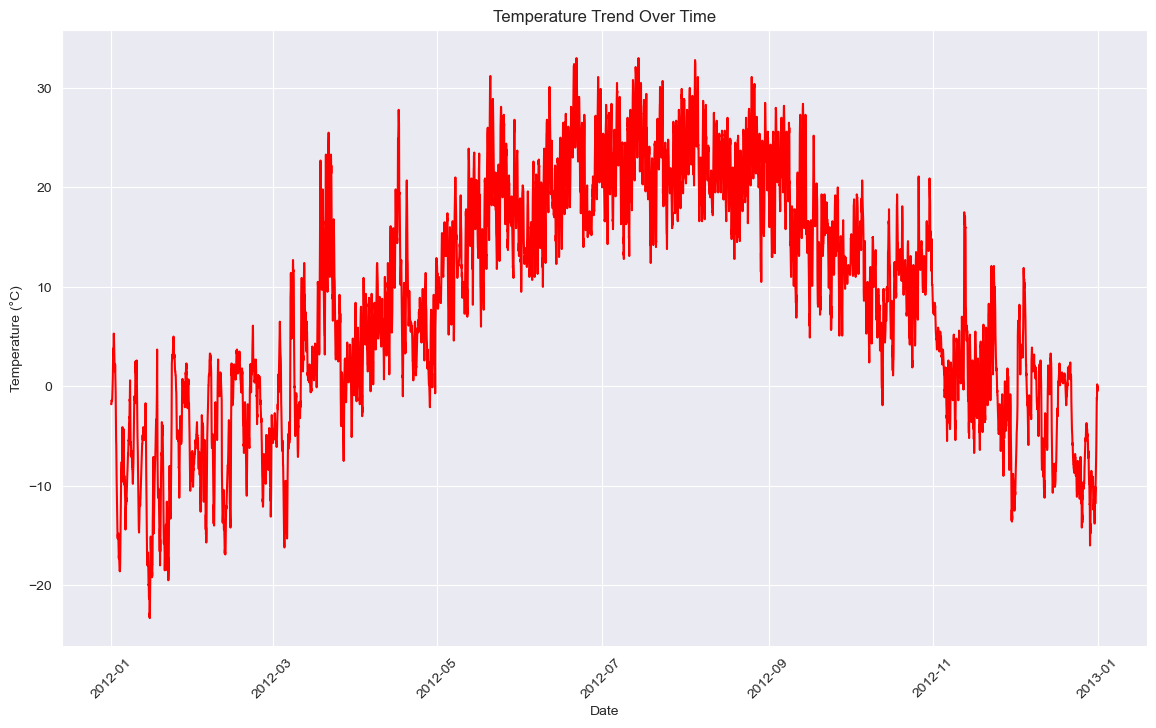

In [135]:
# Plot temperature trend over time
plt.figure(figsize=(14, 8))
sns.lineplot(x=df["date/time"], y=df["temp_c"], color="red")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend Over Time")
plt.xticks(rotation=45)
plt.show()

In [110]:
df.columns

Index(['date/time', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_speed_km/h', 'visibility_km', 'press_kpa', 'weather'],
      dtype='object')

In [154]:
#  Question 2: What is the distribution of temperature values?

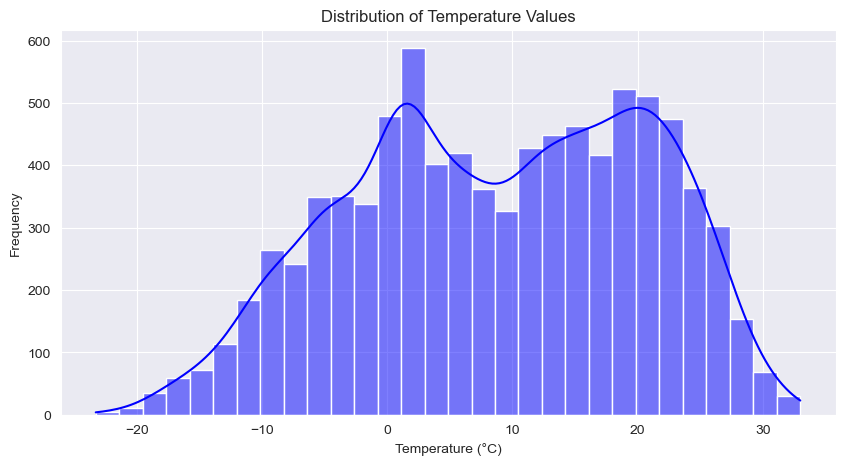

In [155]:
# Question 2: What is the distribution of temperature values?


plt.figure(figsize=(10, 5))
sns.histplot(df["temp_c"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature Values")
plt.show()

In [156]:
# Question 3: What is the relationship between temperature and humidity?


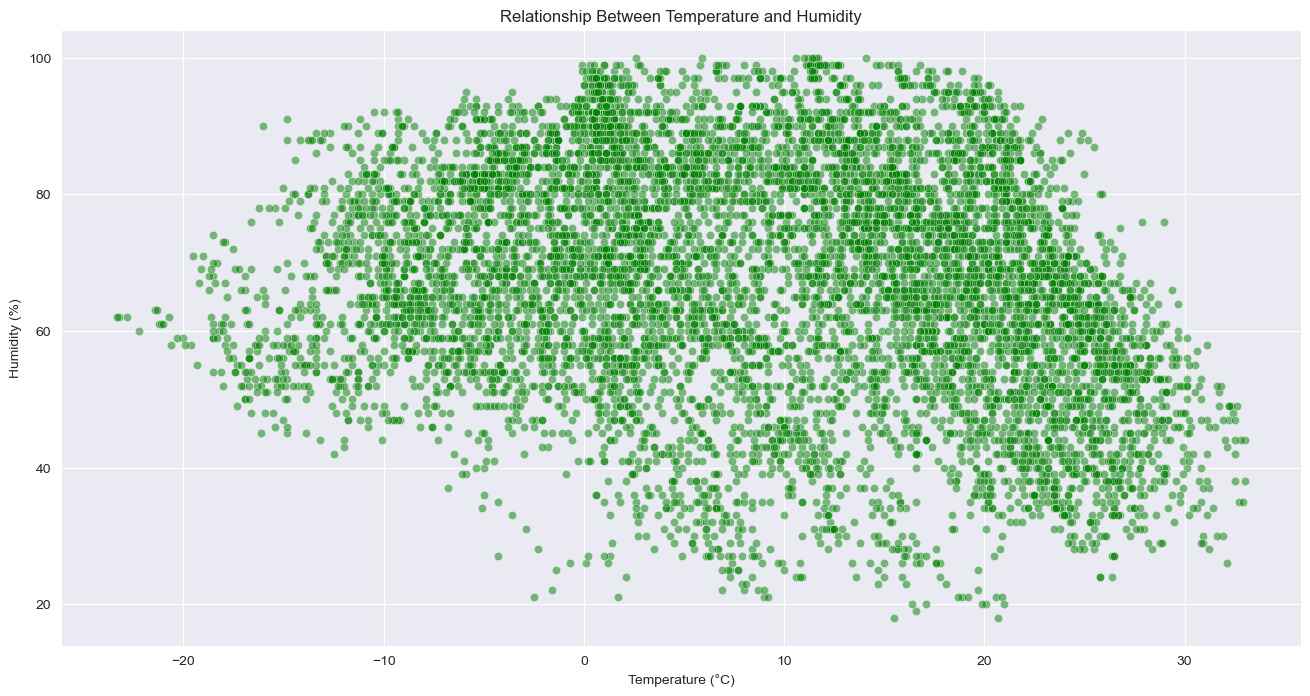

In [157]:
# Question 3: What is the relationship between temperature and humidity?

plt.figure(figsize=(16, 8))
sns.scatterplot(x=df["temp_c"], y=df["rel_hum_%"], alpha=0.5, color="green")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Relationship Between Temperature and Humidity")
plt.show()


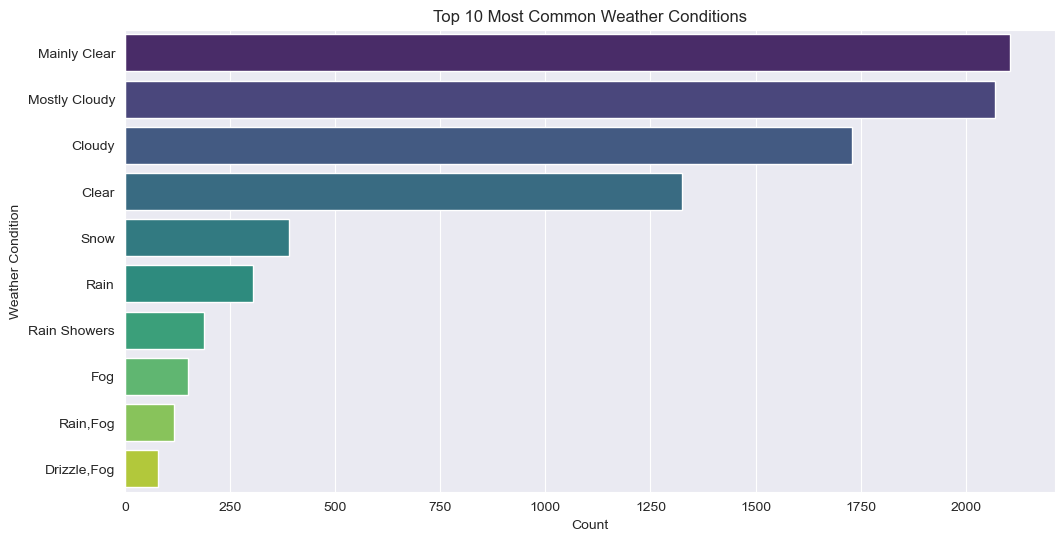

In [114]:
# Question 4: What are the most common weather conditions?

plt.figure(figsize=(12, 6))
weather_counts = df["weather"].value_counts().head(10)  # Top 10 weather conditions
sns.barplot(x=weather_counts.values, y=weather_counts.index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.title("Top 10 Most Common Weather Conditions")
plt.show()

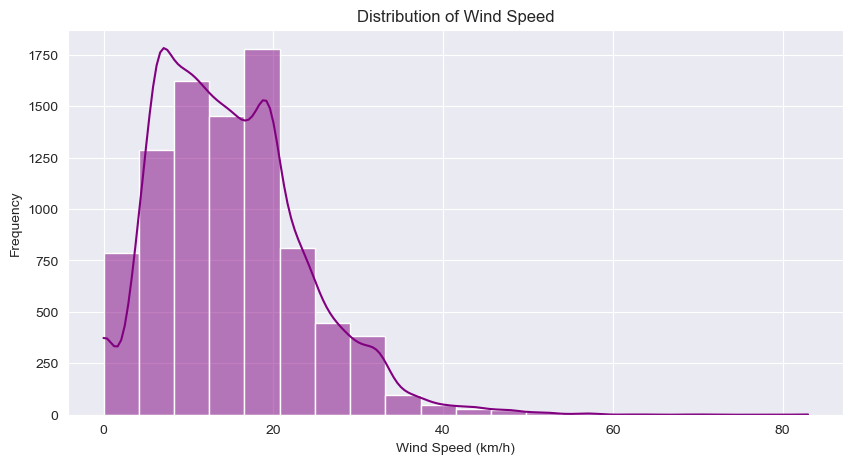

In [116]:
# Question 5: What is the distribution of wind speed?

plt.figure(figsize=(10, 5))
sns.histplot(df["wind_speed_km/h"], bins=20, kde=True, color="purple")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Frequency")
plt.title("Distribution of Wind Speed")
plt.show()

In [115]:
df.columns

Index(['date/time', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_speed_km/h', 'visibility_km', 'press_kpa', 'weather'],
      dtype='object')

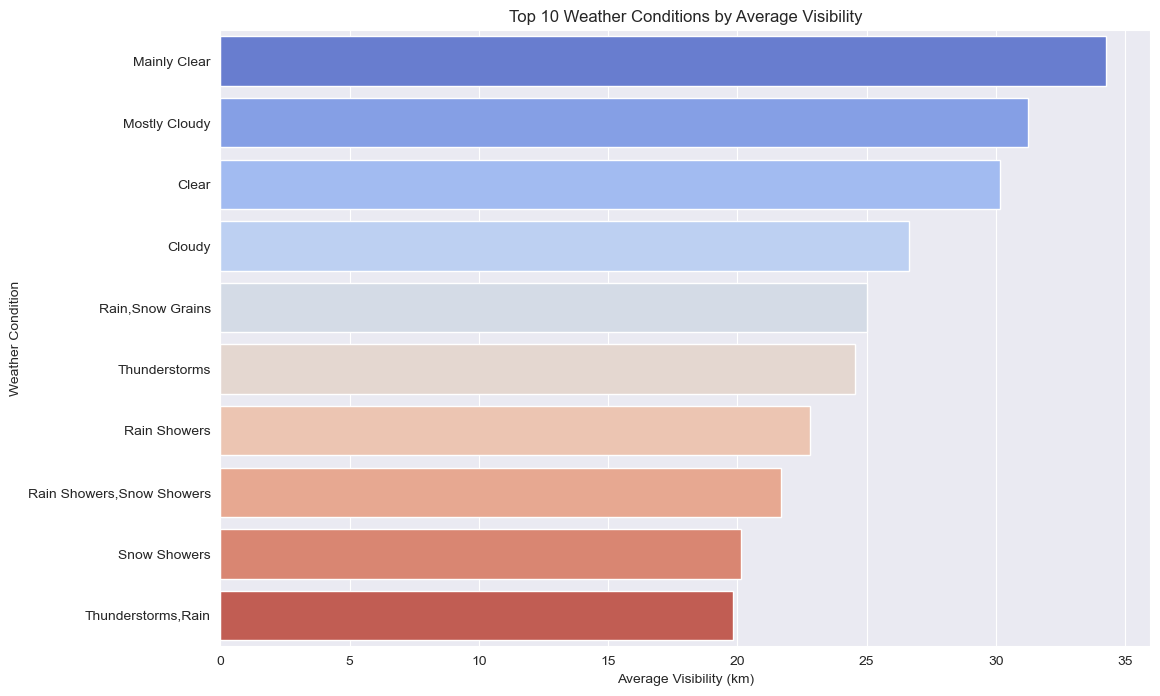

In [132]:
# Question 6: How does visibility vary for different weather conditions?

plt.figure(figsize=(12, 8))
weather_visibility = df.groupby("weather")["visibility_km"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=weather_visibility.values, y=weather_visibility.index, palette="coolwarm")
plt.xlabel("Average Visibility (km)")
plt.ylabel("Weather Condition")
plt.title("Top 10 Weather Conditions by Average Visibility")
plt.show()

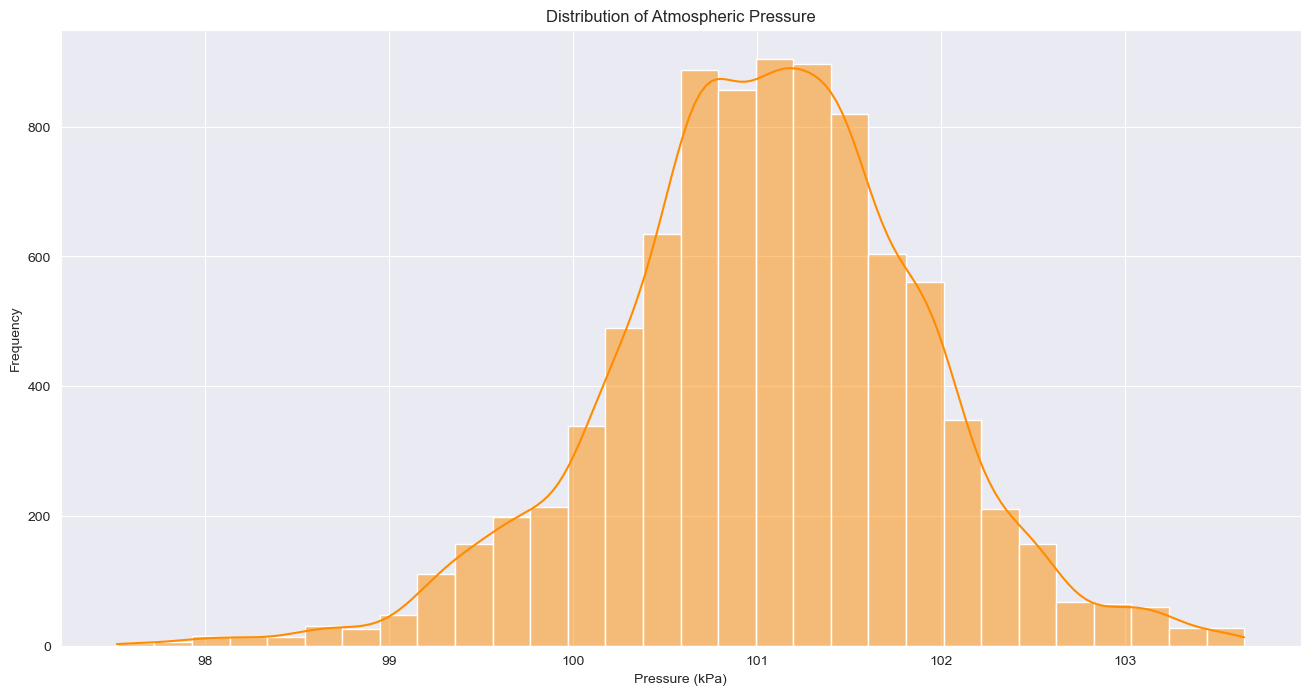

In [129]:
# Question 7: What is the distribution of atmospheric pressure?

plt.figure(figsize=(16, 8))
sns.histplot(df["press_kpa"], bins=30, kde=True, color="darkorange")
plt.xlabel("Pressure (kPa)")
plt.ylabel("Frequency")
plt.title("Distribution of Atmospheric Pressure")
plt.show()

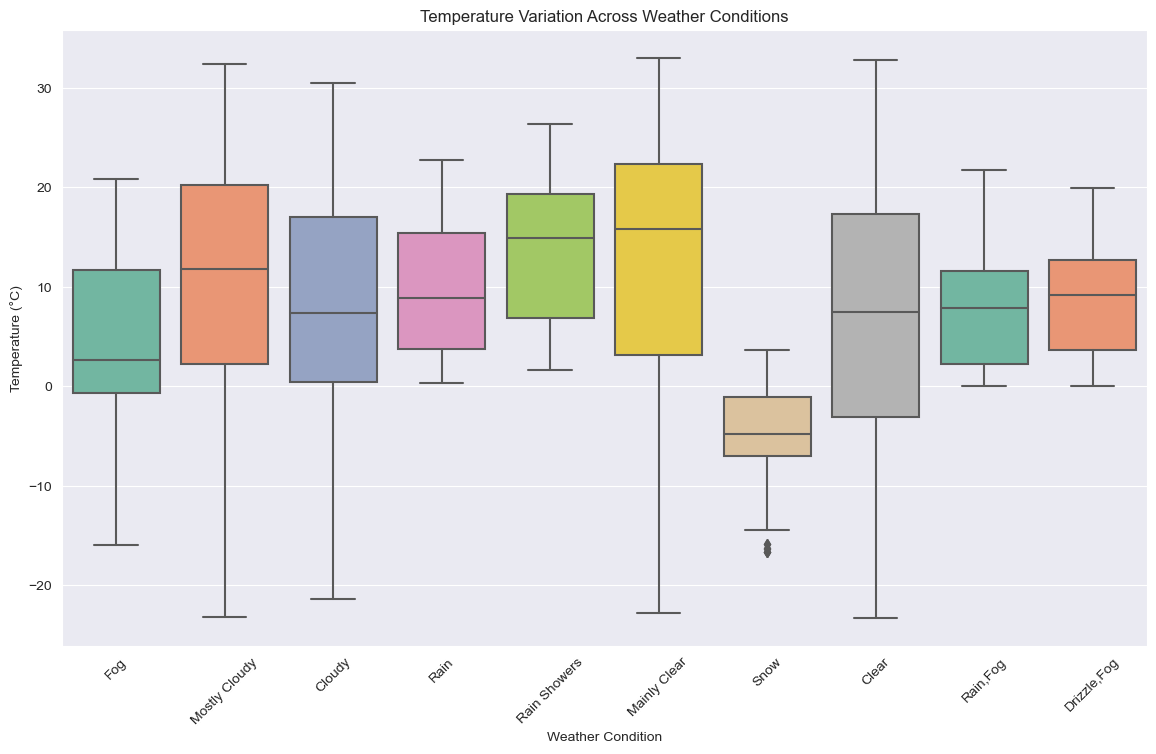

In [127]:
# Question 8: How does temperature vary across different weather conditions?

plt.figure(figsize=(14, 8))

top_weather_conditions = df["weather"].value_counts().index[:10] 

# Top 10 weather conditions
filtered_df = df[df["weather"].isin(top_weather_conditions)]
sns.boxplot(x="weather", y="temp_c", data=filtered_df, palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Weather Condition")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Variation Across Weather Conditions")
plt.show()

The dataset provides valuable insights into seasonal weather trends.

It confirms expected relationships, such as temperature vs. humidity, weather vs. visibility, and weather vs. temperature.

Understanding these patterns can help in weather forecasting and decision-making for industries like agriculture, transportation, and public safety.